In [ ]:
import tensorflow as tf

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#LO PRIMERO QUE VAMOS A HACER ES GENERAR LA NUBE DE PUNTOS QUE SIGA UNA CURVA CUADRÁTICA
#ESTO VA A SER NUESTRO DATASET

x = tf.linspace(-2, 2, 1001)
x = tf.cast(x, tf.float32)

def quad(x):
  y = x**2 + 2*x - 5
  return y

y = quad(x) + tf.random.normal(shape=[1001])

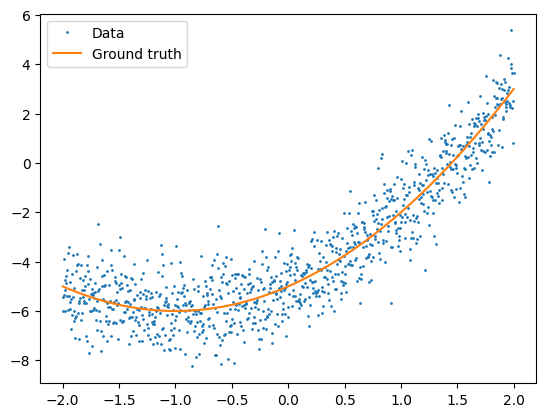

In [ ]:
plt.plot(x.numpy(), y.numpy(), '.',  markersize = 2, label='Data')
plt.plot(x, quad(x), label='Ground truth')
plt.legend()

In [ ]:
#VAMOS A DIVIDIR EL DATASET EN ENTRENAMIENTO, VALIDACIÓN Y TEST
#ESTA LIBRERIA ES DE SKLEARN

(x_train_val, x_test,
 y_train_val, y_test) = train_test_split(x.numpy(),
                                         y.numpy(),
                                         test_size=0.2)

(x_train, x_val,
 y_train, y_val) = train_test_split(x_train_val,
                                    y_train_val,
                                    test_size=0.2)

x_train = tf.constant(x_train)
y_train = tf.constant(y_train)
x_val = tf.constant(x_val)
y_val = tf.constant(y_val)
x_test = tf.constant(x_test)
y_test = tf.constant(y_test)


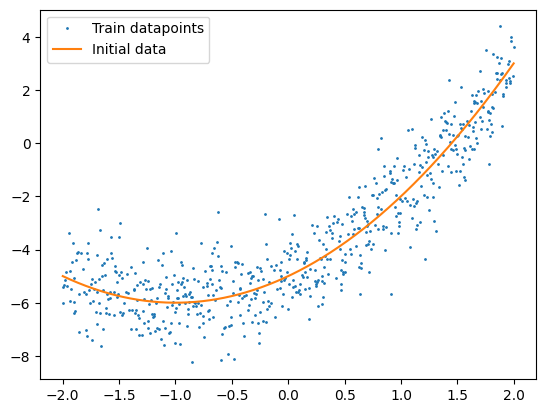

In [ ]:
#VAMOS A DIBUJAR TRES GRAFICAS, UNA CON LOS DATOS DE ENTRENAMIENTO, OTRA CON LOS DE VALIDACIÓN Y OTRA CON LOS DE TEST
plt.plot(x_train, y_train, '.',  markersize = 2, label='Train datapoints')
plt.plot(x, quad(x), label='Initial data')
plt.legend();

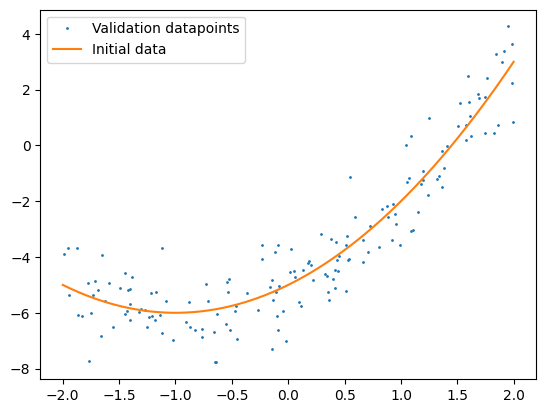

In [ ]:
plt.plot(x_val, y_val, '.',  markersize = 2, label='Validation datapoints')
plt.plot(x, quad(x), label='Initial data')
plt.legend();

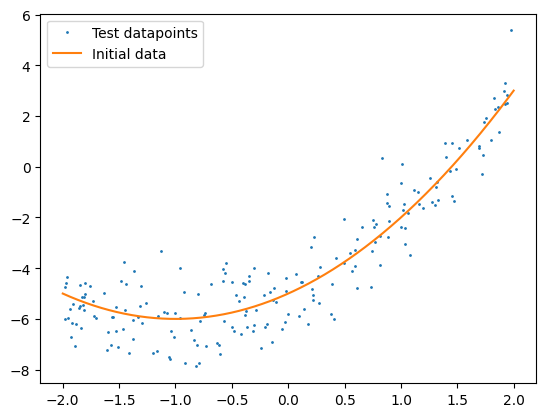

In [ ]:
plt.plot(x_test, y_test, '.',  markersize = 2, label='Test datapoints')
plt.plot(x, quad(x), label='Initial data')
plt.legend();

In [ ]:
#VAMOS A CREAR LA CAPA PERSONALIZADA DEL MODELO

class ConcatLayer(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super().__init__(*kwargs)

  def call(self, input):
    i_stack = tf.concat([input, input**2], axis=1)
    return i_stack

In [ ]:
model_reg = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    ConcatLayer(),
    tf.keras.layers.Dense(units=1, kernel_initializer = tf.random.normal)]
)

In [ ]:
#COMPILAMOS EL MODELO -> CONFIGURAR EL MODELO -> DEFINO LAS PÉRDIDAS


model_reg.compile(
    loss = tf.keras.losses.MSE,
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
)

In [ ]:
model_reg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 concat_layer (ConcatLayer)  (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


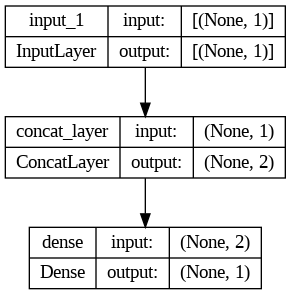

In [ ]:
tf.keras.utils.plot_model(model_reg,
                          to_file = "model_reg.png",
                          show_shapes = True,
                          show_trainable = False,
                          rankdir="TB")

In [ ]:
#INICIAMOS EL ENTRENAMIENTO DEL MODELO


hist = model_reg.fit(x_train, y_train,
                     epochs = 100,
                     batch_size=32,
                     validation_data = (x_val, y_val),
                     verbose = 0)

In [ ]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

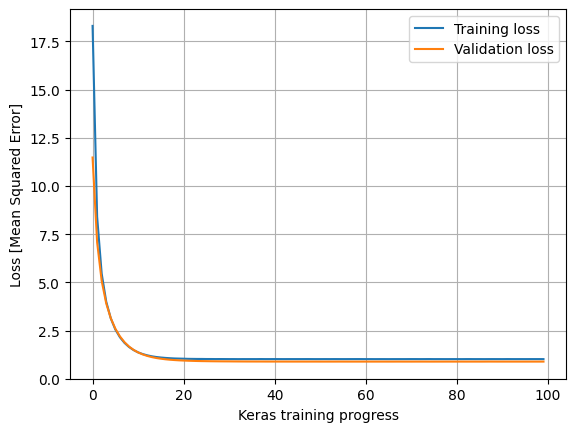

In [ ]:
#VAMOS A DIBUJAR LA GRÁFICA DEL RESULTADO DEL ENTRENAMIENTO Y LA VALIDACIÓN
plt.plot(hist.history['loss'], label = 'Training loss')
plt.plot(hist.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.xlabel('Keras training progress')
plt.grid(True)

In [ ]:
#AHORA EVALUAMOS EL MODELO CON EL DATASET DE ENTRENAMIENTO
model_reg.evaluate(x_train, y_train)

20/20 [==============================] - 0s 2ms/step - loss: 1.0154


1.0154106616973877

20/20 [==============================] - 0s 1ms/step


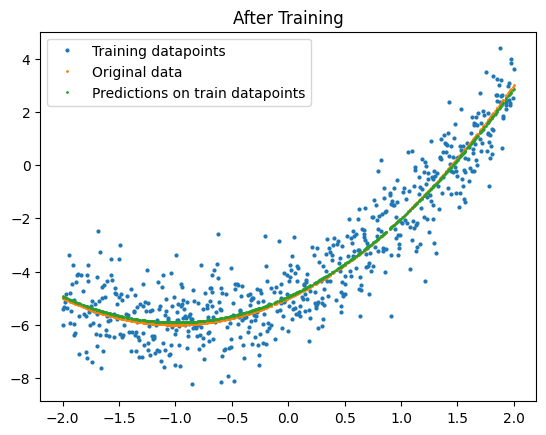

In [ ]:
#VAMOS A DIBUJAR LOS DATOS DE ENTRENAMIENTO, LA FUNCIÓN EN SI Y LOS DATOS QUE HA PREDECIDO EL MODELO
plt.figure()
plt.plot(x_train, y_train, '.',  markersize = 4, label = 'Training datapoints')
plt.plot(x_train, quad(x_train), '.',  markersize = 2, label = 'Original data')
plt.plot(x_train, model_reg.predict(x_train), '.',  markersize = 2, label = 'Predictions on train datapoints')
plt.title('After Training')
plt.legend();

In [ ]:
#VAMOS A COMPARAR LOS PESOS Y LOS BIAS QUE TENEMOS AHORA MISMO CON LOS ORIGINALES
#ORIGINAL -> y = x**2 + 2*x - 5

print('Weights: ', model_reg.layers[1].weights[0].numpy().squeeze())
print('Biases:', model_reg.layers[1].weights[1].numpy().squeeze())

Weights:  [1.9533002 0.9785278]
Biases: -4.9396486


In [ ]:
#EVALUAMOS EL MODELO DE NUEVO CON LOS DATOS DE TEST
model_reg.evaluate(x_test, y_test) #esto nos sirve para ver el error

7/7 [==============================] - 0s 3ms/step - loss: 0.9946


0.9946402907371521

In [ ]:
#VAMOS A HACER PREDICCIONES
pred = model_reg.predict(x_test)

7/7 [==============================] - 0s 3ms/step


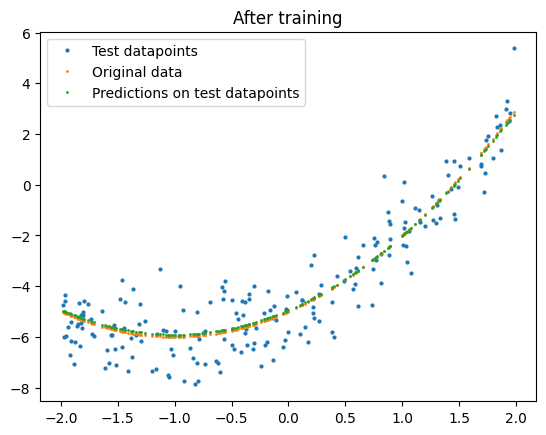

In [ ]:
plt.figure()
plt.plot(x_test, y_test, '.', markersize = 4, label = 'Test datapoints')
plt.plot(x_test, quad(x_test), '.', markersize = 2, label = 'Original data')
plt.plot(x_test, model_reg(x_test), '.', markersize = 2, label = 'Predictions on test datapoints')
plt.title('After training')
plt.legend();